### Let's begin with importing needed packages

In [1]:
import numpy as np
import pandas as pd
import requests
import folium
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib as mat
import matplotlib.pyplot as plt

#### I already downloaded data to my computer, now let's open the data

In [2]:
dft = pd.read_csv('2016_neighbourhood_profiles.csv', encoding='latin1')
dft.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Malvern West,Alderwood,Annex,Banbury-Don Mills,...,Willowdale East,Willowdale West,Willowridge,Woburn,Woodbine,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,...,51,37,7,137,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695",...,"50,434","16,936","22,156","53,485","20,406","14,349","11,817","12,528","27,593","14,804"
3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177","26,918",...,"45,041","15,004","21,343","53,350","7,826","13,986","10,578","11,652","27,713","14,687"
4,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,2.90%,...,12.00%,12.90%,3.80%,0.30%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


#### As you see form dataset Neighborhood names come after 5th column. With this knowledge let's get Neighborhood names at first.

In [3]:
names = list(dft.columns[5:])
print(names)

['Agincourt North', 'Malvern West', 'Alderwood', 'Annex', 'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park', 'Beechborough', 'Bendale', 'Black Creek', 'Blake', 'Briar Hill', 'Bridle Path', 'Broadview North', 'Brookhaven', 'Cabbagetown', 'Caledonia-Fairbank', 'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor', 'Clairlea', 'Cliffcrest', 'Corso Italia-Davenport', 'Danforth', 'Danforth East York', 'Don Valley Village', 'Dorset Park', 'Dovercourt', 'Downsview', 'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley', 'Eglinton East', 'Elms-Old Rexdale', 'Englemount-Lawrence', 'Etobicoke West Mall', 'Flemingdon Park', 'Forest Hill', 'Glenfield', 'Greenwood', 'Guildwood', 'Henry Farm', 'High Park North', 'High Park-Swansea', 'Highland Creek', 'Hillcrest Village', 'Humber Heights-Westmount', 'Humber Summit', 'Humber', 'Humewood', 'Ionview', 'Islington-City Centre West', 'Junction Area', 'Keelesdale-Egl

#### The data that I've got from website of Toronto doesn't contains location data for neighborhoods. That's why I decided to get locations with the help of Folium library  and I will use locations data to work with Foursquare API later

In [5]:
loc = []
for address in names:
    geolocator = Nominatim(user_agent='toronto', timeout=50)
    location = geolocator.geocode(address +', Toronto, ON, Canada')
    if address != None:
        loc.append(location)

In [6]:
loc

[Location(Agincourt North, Scarborough North, Scarborough, Toronto, Golden Horseshoe, Ontario, M1S 3Y7, Canada, (43.8080383, -79.2664391, 0.0)),
 Location(Malvern West, Scarborough North, Scarborough, Toronto, Ontario, M1S 3V8, Canada, (43.790679, -79.248491, 0.0)),
 Location(Alderwood, Etobicoke—Lakeshore, Etobicoke, Toronto, Golden Horseshoe, Ontario, M8W 3T7, Canada, (43.6017173, -79.5452325, 0.0)),
 Location(The Annex, University—Rosedale, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5R 2X3, Canada, (43.6703377, -79.407117, 0.0)),
 Location(Banbury Road, The Bridle Path, Don Valley West, North York, Toronto, Ontario, M3B 1H4, Canada, (43.7358167, -79.3587782, 0.0)),
 Location(Former Bathurst Manor Plaza grounds, York Centre, Toronto, Ontario, Canada, (43.76389295, -79.4563669371095, 0.0)),
 Location(Bay Street, Church-Wellesley Village, Toronto Centre, Old Toronto, Toronto, Ontario, M5S 2S3, Canada, (43.6642864, -79.3871138, 0.0)),
 Location(Bayview Village, Don Valley North, 

In [7]:
res = list(filter(None, loc))
lat = []
lng = []
for i in res:
    lat.append(i.latitude)
    lng.append(i.longitude)

#### Now I will create new dataset with four columns: 'Population', 'Income', 'Latitude', and 'Longitude'

In [9]:
df = pd.DataFrame(columns = ['Population', 'Income', 'Latitude', 'Longitude'], index = names)
df.head()

,Population,Income,Latitude,Longitude
Agincourt North,NaN,NaN,NaN,NaN
Malvern West,NaN,NaN,NaN,NaN
Alderwood,NaN,NaN,NaN,NaN
Annex,NaN,NaN,NaN,NaN
Banbury-Don Mills,NaN,NaN,NaN,NaN


#### I will use Population an income data for 2016 and location data I've got previously

In [10]:
df['Population'] = dft.iloc[2,5:]
df['Income'] = dft.iloc[935,5:]
df['Latitude'] = lat
df['Longitude']= lng

#### Now let's look to Dataframe

In [11]:
df

,Population,Income,Latitude,Longitude
Agincourt North,"29,113","25,005",43.808038,-79.266439
Malvern West,"23,757","20,400",43.790679,-79.248491
Alderwood,"12,054","10,265",43.601717,-79.545232
Annex,"30,526","26,295",43.670338,-79.407117
Banbury-Don Mills,"27,695","23,410",43.735817,-79.358778
Bathurst Manor,"15,873","13,270",43.763893,-79.456367
Bay Street Corridor,"25,797","23,945",43.664286,-79.387114
Bayview Village,"21,396","18,730",43.769197,-79.376662
Bayview Woods-Steeles,"13,154","11,150",43.798127,-79.382973
Bedford Park,"23,236","18,560",43.737388,-79.410925


#### Now I want to sort dataframe by Income to show best places for opening a restraunt. Firstly, let's check data types of dataframe

In [12]:
df.dtypes

Population     object
Income         object
Latitude      float64
Longitude     float64
dtype: object

#### As you see data types of Population and Income are objects and in this situtation I can't sort values, there I will change data type to integer  

In [13]:
df['Population']=df['Population'].str.replace(',','').astype(int)
df['Income']=df['Income'].str.replace(',','').astype(int)

#### Now let's sort values from highest income to lowest income to see best places to open restraunt 

In [14]:
df = df.sort_values('Income', ascending = False)

#### Let's look ar ranking of Neighborhoods by Income

In [15]:
df.head()

,Population,Income,Latitude,Longitude
Willowdale East,50434,44340,43.775356,-79.416686
Woburn,53485,43410,43.759824,-79.225291
Rouge,46496,38125,43.804930,-79.165837
Islington-City Centre West,43965,37410,43.648795,-79.549000
L'Amoreaux,43993,37385,43.799003,-79.305967


#### You see top five Neighboorhoods by Income which can be more profitable places for restraunt owner

#### And let's visualize our data

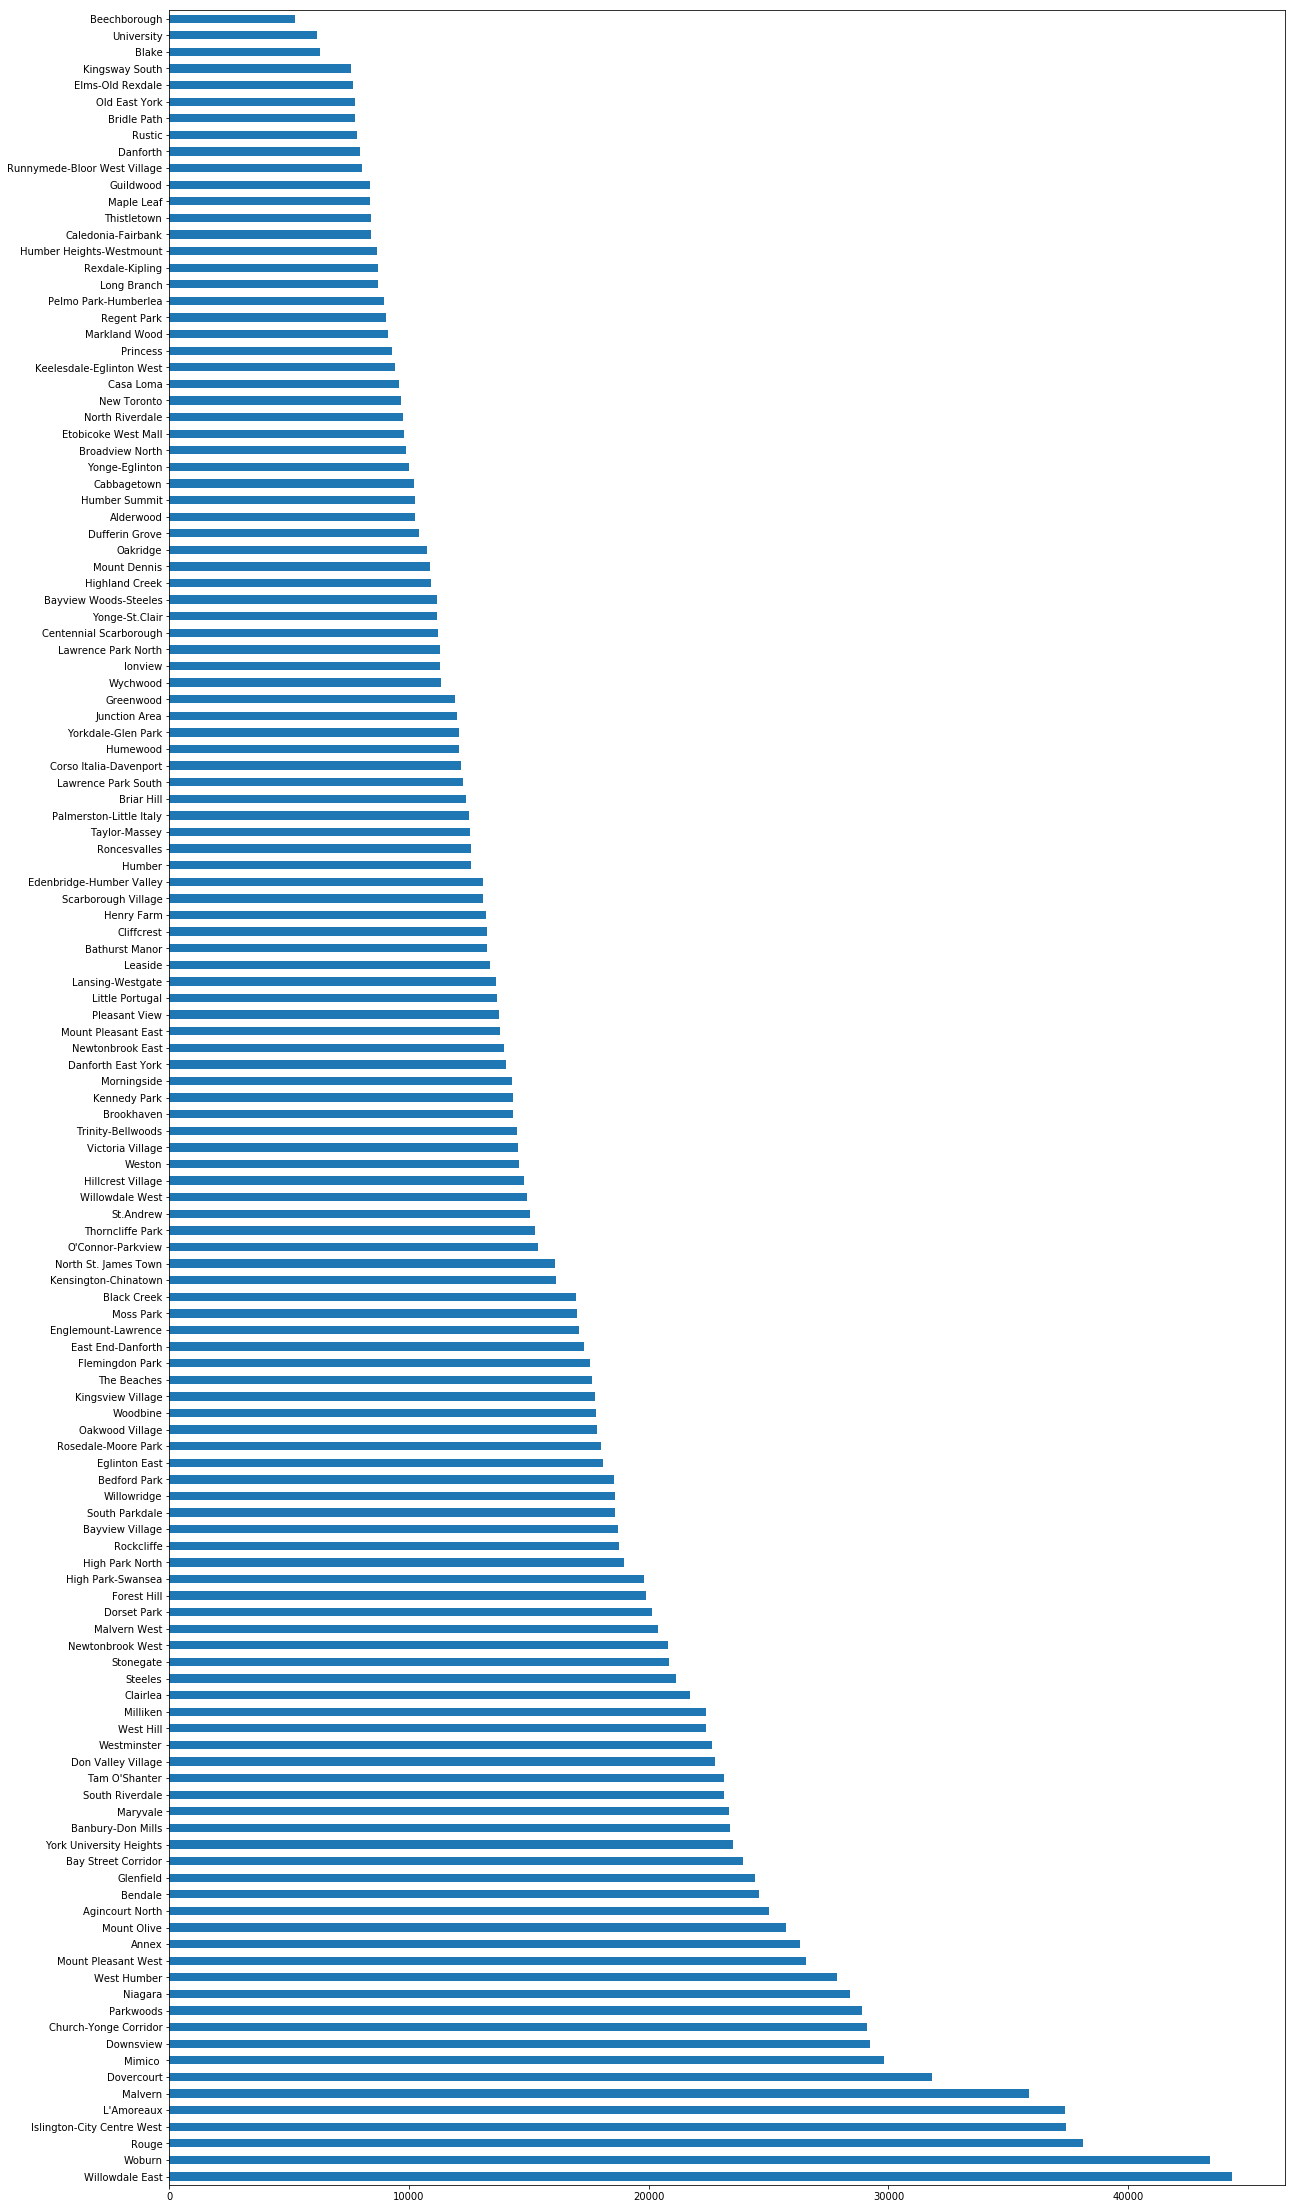

In [16]:
df['Income'].plot(kind='barh',
                 figsize = [20,40])


### I have all enough data for using with Foursquare API, and now Foursquare part begins.

#### Firstly, let's get location of Toronto to use in map

In [17]:
address2 = 'Toronto, ON'
geolocator = Nominatim(user_agent='trt')
location = geolocator.geocode(address2)
lat_t = location.latitude
lng_t = location.longitude

In [18]:
t_map = folium.Map(location = [lat_t,lng_t], zoom_start = 10.3)

#### Now I will show neighborhoods in map using location data that I've got

In [30]:
for lat,lng,pop,inc,neighborhood in zip(df['Latitude'],df['Longitude'],df['Population'],df['Income'],df.index):
    label = '{}, Population: {}, Income: ${}'.format(neighborhood,pop,inc)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup=label,
    color='blue',
    fill = True,
    fill_color = 'blue',
    fill_opacity = 0.8).add_to(t_map)

#### And our map is ready. Blue points show neighborhoods.
(Note! Actually I added red points later to map which you will see soon, I runned this line at the end again, there you see red points also.)

In [31]:
t_map

#### Now I will begin to use Foursquare API with using my Foursquare details.

In [21]:
CLIENT_ID='BK2NLBQJF5BHYK1XWPJIJKP4SPERLSGWECH4IRLDEAK1PNWR'
CLIENT_SECRET='4BNB51LWHFYWV3V22B0WAU5EDAE1AOA204VTFIDH03WWMK5V'
VERSION='20180604'
LIMIT=500
RADIUS=1000
search_query = 'Italian'

#### And let's create a function

In [22]:
def getNearbyVenues(names, latitudes,longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names,latitudes,longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        results=results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
 

In [23]:
nv=getNearbyVenues(names=names, latitudes=df['Latitude'],longitudes=df['Longitude'], radius=1000)

#### I only want to get Chinese Restaurant location, therefore I created new dataframe called nv and used reset_index() function

In [24]:
nv = nv[nv['Venue Category'] == 'Chinese Restaurant']

In [34]:
nv.reset_index()

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,42,Agincourt North,43.775356,-79.416686,Artisan Noodle 老碗,43.776265,-79.414630,Chinese Restaurant
1,126,Malvern West,43.759824,-79.225291,Lucky Hakka,43.762470,-79.214164,Chinese Restaurant
2,156,Banbury-Don Mills,43.799003,-79.305967,Fishman Lobster Clubhouse Restaurant 魚樂軒,43.801909,-79.295409,Chinese Restaurant
3,157,Banbury-Don Mills,43.799003,-79.305967,Mr Congee Chinese Cuisine 龍粥記,43.798879,-79.318335,Chinese Restaurant
4,158,Banbury-Don Mills,43.799003,-79.305967,Buddy Cafe,43.799156,-79.306280,Chinese Restaurant
5,159,Banbury-Don Mills,43.799003,-79.305967,Divine Wok Restaurant,43.799102,-79.306483,Chinese Restaurant
6,588,Black Creek,43.630491,-79.482175,Wok Terminal,43.630631,-79.484513,Chinese Restaurant
7,901,Broadview North,43.808038,-79.266439,Congee Town 太皇名粥,43.809035,-79.267634,Chinese Restaurant
8,922,Broadview North,43.808038,-79.266439,Kin Kin Bubble Tea Co,43.807852,-79.270296,Chinese Restaurant
9,936,Brookhaven,43.753520,-79.255336,Lucky Chinese (Haka) Restaurant,43.752465,-79.265311,Chinese Restaurant


#### Now let's add Chinese Restaurant locations to our map in red color.

In [35]:
for lat,lng,name,catg in zip(nv['Venue Latitude'],nv['Venue Longitude'],nv['Venue'],nv['Venue Category']):
    label = '{}, {}'.format(name,catg)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup=label,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.8).add_to(t_map)

#### Now people who want to open Chinese restaurant in Toronto can do it in best way using this map.

In [36]:
t_map

#### Let's remember which Neighborhoods have more income and more population by calling df.head()

In [43]:
df.head()

,Population,Income,Latitude,Longitude
Willowdale East,50434,44340,43.775356,-79.416686
Woburn,53485,43410,43.759824,-79.225291
Rouge,46496,38125,43.804930,-79.165837
Islington-City Centre West,43965,37410,43.648795,-79.549000
L'Amoreaux,43993,37385,43.799003,-79.305967


#### As you see from this dataframe Willowdale and Woburn are in top. But  there are already enough Chinese restaurants in these neighborhoods. Having rival in the same area can make new opening restaurant less profitable. That's why owner must choose Rouge or Islington - City Centre West which doesn't have any Chinese restaurant, but they have enough big amount of income and population.